In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from calib_fit import linear

In [18]:
SOURCE_LIST = ("60Co", "137Cs", "22Na")

E_CS     = 661.7  # keV
E_NA_1   = 511.0  # keV
E_NA_2   = 1274.5 # keV
E_CO_1   = 1173.2 # keV
E_CO_2   = 1332.5 # keV
E_CO_SUM = 2614.5 # keV
E_BE     = 4438.0 # keV
E_BE_1   = E_BE - 511
E_BE_2   = E_BE - 511*2

ENERGY_NAMES = ("22Na_511", "22Na_1274", "60Co_1173", "60Co_1332", "137Cs_662", "60Co_2665", "7Be_4438", "7Be_3927", "7Be_3416")

In [19]:
parameters_path = "./calib-parameters/"
name = "labr_a"

# read parameters
Na_511  = np.loadtxt(f"{parameters_path}{name}_22Na_511keV_parameters.txt",  usecols=(1, 2))
Na_1274 = np.loadtxt(f"{parameters_path}{name}_22Na_1274keV_parameters.txt", usecols=(1, 2))
Cs_662  = np.loadtxt(f"{parameters_path}{name}_137Cs_662keV_parameters.txt", usecols=(1, 2))
Co_1173 = np.loadtxt(f"{parameters_path}{name}_60Co_1173keV_parameters.txt", usecols=(1, 2))
Co_1332 = np.loadtxt(f"{parameters_path}{name}_60Co_1332keV_parameters.txt", usecols=(1, 2))
Co_2665 = np.loadtxt(f"{parameters_path}{name}_60Co_2665keV_parameters.txt", usecols=(1, 2))
Be_4438 = np.loadtxt(f"{parameters_path}{name}_7Be_4438keV_parameters.txt",  usecols=(1, 2))
Be_3416 = np.loadtxt(f"{parameters_path}{name}_7Be_3416keV_parameters.txt",  usecols=(1, 2))
Be_3927 = np.loadtxt(f"{parameters_path}{name}_7Be_3927keV_parameters.txt",  usecols=(1, 2))

Na_511_mu     = Na_511[1][0]
Na_511_mu_err = Na_511[1][1]

print(f"Na_511_mu  = {Na_511_mu:.3f} +/- {Na_511_mu_err:.3f}")

Na_1274_mu = Na_1274[1][0]
Na_1274_mu_err = Na_1274[1][1]

print(f"Na_1274_mu = {Na_1274_mu:.3f} +/- {Na_1274_mu_err:.3f}")

Cs_662_mu = Cs_662[1][0]
Cs_662_mu_err = Cs_662[1][1]

print(f"Cs_662_mu  = {Cs_662_mu:.3f} +/- {Cs_662_mu_err:.3f}")

Co_1173_mu = Co_1173[1][0]
Co_1173_mu_err = Co_1173[1][1]

print(f"Co_1173_mu = {Co_1173_mu:.3f} +/- {Co_1173_mu_err:.3f}")

Co_1332_mu = Co_1332[1][0]
Co_1332_mu_err = Co_1332[1][1]

print(f"Co_1332_mu = {Co_1332_mu:.3f} +/- {Co_1332_mu_err:.3f}")

Co_2665_mu = Co_2665[1][0]
Co_2665_mu_err = Co_2665[1][1]

print(f"Co_2665_mu = {Co_2665_mu:.3f} +/- {Co_2665_mu_err:.3f}")

Be_4438_mu = Be_4438[1][0]
Be_4438_mu_err = Be_4438[1][1]

print(f"Be_4438_mu = {Be_4438_mu:.3f} +/- {Be_4438_mu_err:.3f}")

Be_3416_mu = Be_3416[1][0]
Be_3416_mu_err = Be_3416[1][1]

print(f"Be_3416_mu = {Be_3416_mu:.3f} +/- {Be_3416_mu_err:.3f}")

Be_3927_mu = Be_3927[1][0]
Be_3927_mu_err = Be_3927[1][1]

print(f"Be_3927_mu = {Be_3927_mu:.3f} +/- {Be_3927_mu_err:.3f}")

Na_511_mu  = 151.508 +/- 0.021
Na_1274_mu = 381.187 +/- 0.149
Cs_662_mu  = 196.517 +/- 0.016
Co_1173_mu = 351.070 +/- 0.010
Co_1332_mu = 399.537 +/- 0.013
Co_2665_mu = 790.088 +/- 0.283
Be_4438_mu = 1347.812 +/- 0.197
Be_3416_mu = 1039.207 +/- 0.540
Be_3927_mu = 1194.845 +/- 0.903


In [20]:
# build two arrays for the linear fit
true_energy    = np.array([E_NA_1, E_NA_2, E_CO_1, E_CO_2, E_CS, E_CO_SUM, E_BE, E_BE_1, E_BE_2])
exp_energy     = np.array([Na_511_mu, Na_1274_mu, Co_1173_mu, Co_1332_mu, Cs_662_mu, Co_2665_mu, Be_4438_mu, Be_3927_mu, Be_3416_mu])
exp_energy_err = np.array([Na_511_mu_err, Na_1274_mu_err, Co_1173_mu_err, Co_1332_mu_err, Cs_662_mu_err, Co_2665_mu_err, Be_4438_mu_err, Be_3927_mu_err, Be_3416_mu_err])

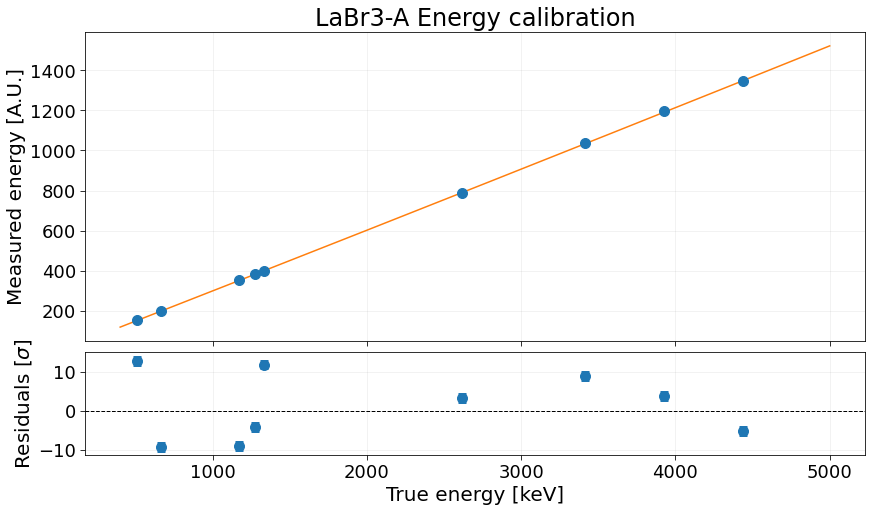

In [28]:
from matplotlib import gridspec
from scipy.optimize import curve_fit

# plot the means against the energies
fig = plt.figure(figsize=(12, 7), constrained_layout=True)

gs  = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[3, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex = ax1)

ax1.grid(color="grey", alpha=0.1, linestyle="solid", linewidth=1)
ax2.grid(color="grey", alpha=0.1, linestyle="solid", linewidth=1)

ax1.tick_params(labelbottom=False)


ax1.errorbar(
    x          = true_energy, 
    y          = exp_energy, 
    yerr       = exp_energy_err, 
    linewidth  = 0, 
    marker     = '.', 
    markersize = 20, 
    elinewidth = 1, 
    capsize    = 2, 
    color      = "tab:blue",
    label      = "Sector 6 Strip 6"
)

def parabola(x, a, b, c):
    return a*x**2 + b*x + c

par, cov = curve_fit(parabola, true_energy, exp_energy, sigma=exp_energy_err, absolute_sigma=True)
err = np.sqrt(np.diag(cov))

residuals = exp_energy - parabola(true_energy, *par)
chisq = np.sum((residuals/exp_energy_err)**2)

xgrid = np.linspace(400, 5000, 1000)
ax1.plot(xgrid, parabola(xgrid, *par), color="tab:orange", label="Linear fit")

# par_str = f"y = ({par[0]:.6f} +/- {err[0]:.6f}) x + ({par[1]:.3f} +/- {err[1]:.3f})"
# ax1.text(0.03, 0.95, par_str, transform=ax1.transAxes, fontsize=18, verticalalignment="top")
# ax1.text(0.03, 0.85, f"$\chi^2$ / ndf = {chisq:.2f} / {len(true_energy)-2}", transform=ax1.transAxes, fontsize=18, verticalalignment="top")


# normalize the residuals
sigmas = residuals / exp_energy_err

# propagate the errors
sigmas_err = np.sqrt(1 + (exp_energy_err/exp_energy)**2)

ax2.errorbar(
    x          = true_energy, 
    y          = sigmas, 
    yerr       = sigmas_err, 
    linewidth  = 0, 
    marker     = '.', 
    markersize = 20, 
    elinewidth = 2, 
    capsize    = 4, 
    capthick   = 3,
    color      = "tab:blue"
)

ax2.axhline(0, color="black", linestyle="dashed", linewidth=1)


ax1.set_title("LaBr3-A Energy calibration", fontsize=24)
ax2.set_xlabel("True energy [keV]", fontsize=20)
ax1.set_ylabel("Measured energy [A.U.]", fontsize=20)
ax2.set_ylabel("Residuals [$\sigma$]", fontsize=20)

ax1.tick_params(axis="both", which="major", labelsize=18, length=5)
ax2.tick_params(axis="both", which="major", labelsize=18, length=5)


plt.show()

In [29]:
# save the linear parameters without error
with open(f"{parameters_path}{name}_parabolic_parameters.txt", "w") as f:
    f.write(f"{par[0]} {par[1]} {par[2]}")

## Calibrated spectra for the labr_a detector

In [7]:
from DataFormat import Detector
from plot_spectrum import plot_energy_spectrum

In [8]:
E_FILTER    = ([10, 5, 5], [500, 500, 500])

In [9]:
LaBr3_A = Detector(name="labr_a", sources=SOURCE_LIST)

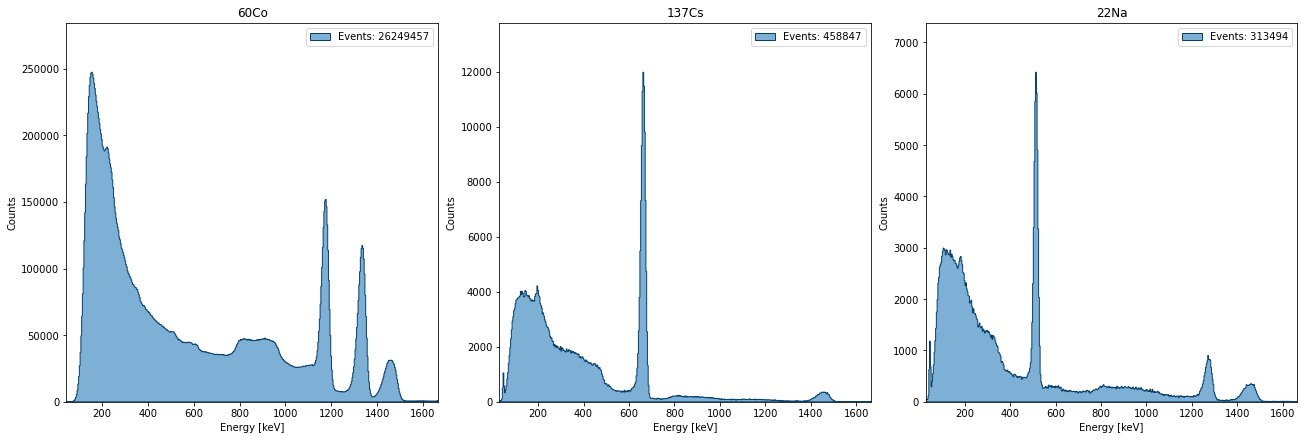

In [10]:
calibration = np.loadtxt(f"{parameters_path}{name}_linear_parameters.txt")
m = calibration[0]
q = calibration[1]

fig = plt.figure(figsize=(18, 6), constrained_layout=True)

for i, source in enumerate(SOURCE_LIST):
    x, y = LaBr3_A.get_energy_histogram(source)
    x_cal = (x - q)/m
    
    e_filter = (x > E_FILTER[0][i]) & (x < E_FILTER[1][i])
    ax = plot_energy_spectrum(
            x             = x_cal, 
            y             = y, 
            energy_filter = e_filter,
            bins          = x_cal[e_filter], 
            fig           = fig, 
            title         = f"{source}",
            xlabel        = "Energy [keV]",
            nrows         = 1, 
            ncols         = 3, 
            idx           = 1+i,
            label         = f"Events: {np.sum(y[e_filter]):.0f}"
        )
    ax.legend()
    
plt.show()

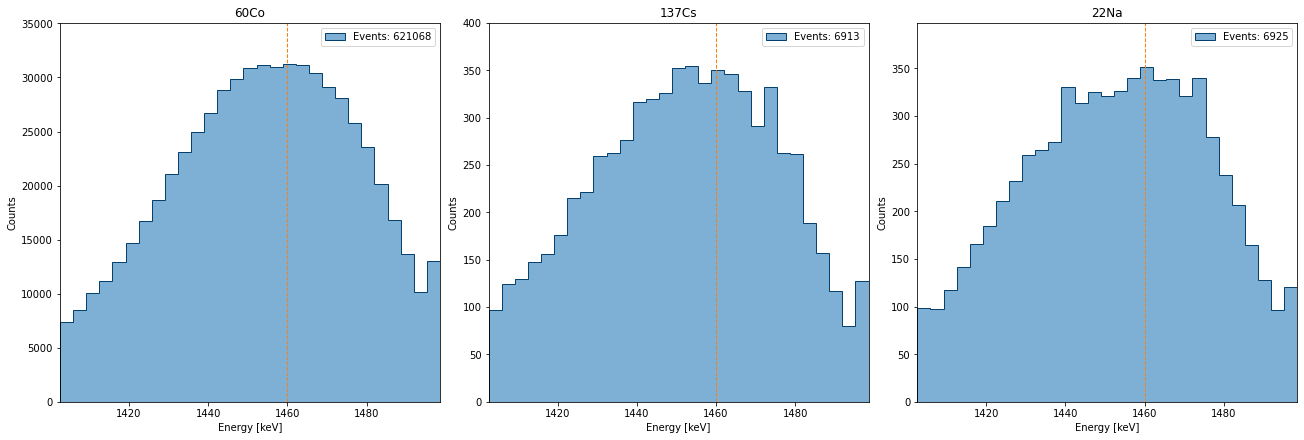

In [12]:
E_K = 1460

fig = plt.figure(figsize=(18, 6), constrained_layout=True)

for i, source in enumerate(SOURCE_LIST):
    x, y = LaBr3_A.get_energy_histogram(source)
    x_cal = (x - q)/m
    
    e_filter = (x_cal > 1400) & (x_cal < 1500)
    ax = plot_energy_spectrum(
            x             = x_cal, 
            y             = y, 
            energy_filter = e_filter,
            bins          = x_cal[e_filter], 
            fig           = fig, 
            title         = f"{source}",
            xlabel        = "Energy [keV]",
            nrows         = 1, 
            ncols         = 3, 
            idx           = 1+i,
            label         = f"Events: {np.sum(y[e_filter]):.0f}"
        )
    ax.legend()
    
    ax.axvline(E_K, color="tab:orange", linestyle="dashed", linewidth=1)
    
plt.show()